<a href="https://colab.research.google.com/github/sarahhuahua/nstools/blob/master/K_means_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


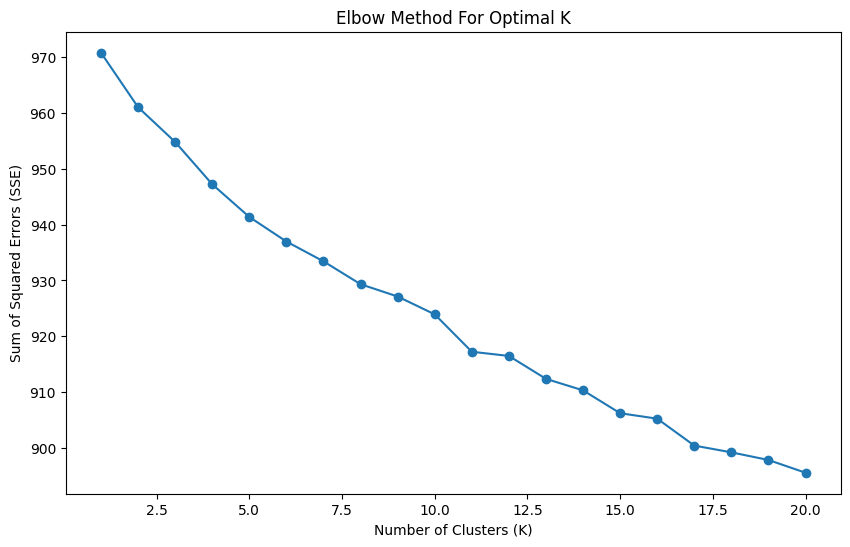

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('Title.csv')

# 提取标题
titles = df['Article Title'].tolist()

# TF-IDF 特征提取
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles)

# 使用手肘法选择最佳K值
sse = []
k_range = range(1, 21)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 绘制手肘图
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()



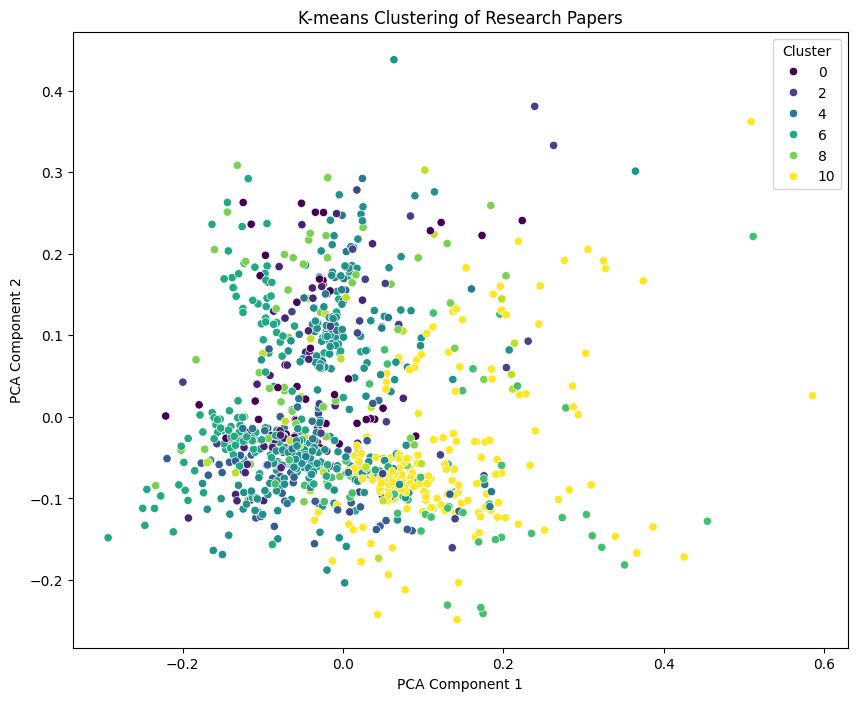

Cluster 0:
 - Knowledge Management Strategy in Learning Organization-A Case of E-commerce
 - Knowledge management practices learned from the COVID-19 pandemic: a case of knowledge-intensive organisation
 - A knowledge management strategy for the Jason organization: A case study
 - Understanding the Impact of Knowledge Sharing in Organisations: A Case Study
 - Knowledge Management A Case Study of CeedOman company, Issues and Solutions
 - USE OF KNOWLEDGE MANAGEMENT SYSTEMS - CASE OF SLOVENIA
 - Managing and processing knowledge sharing between software organizations:: A case study
 - Designing effective knowledge transfer in an organisation - a case study based on migration projects implemented in two SSC organisations
 - Knowledge Spiral in Knowledge Management Frameworks: the Case of Two Organizations in Portugal
 - Knowledge Integration: The Case of a Portuguese Organization
 - Engaging national organizations for knowledge translation: Comparative case studies in knowledge value mapp

In [12]:
# 应用K-means聚类
k = 11  # 假设我们将数据分为五个聚类，可以根据实际情况调整
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

# 获取聚类标签
labels = model.labels_

# 将聚类标签添加到原始数据中
df['Cluster'] = labels

# 使用PCA将高维TF-IDF特征降到二维
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# 将降维后的结果保存到数据框中
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# 可视化聚类结果
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering of Research Papers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 输出每个聚类的结果
for cluster in range(k):
    print(f'Cluster {cluster}:')
    cluster_titles = df[df['Cluster'] == cluster]['Article Title'].tolist()
    for title in cluster_titles:
        print(f' - {title}')
    print()

# 保存聚类结果
df.to_csv('Clustered_Titles.csv', index=False)

    Art   Biotechnology & Applied Microbiology   Business, Finance  \
0     0                                      0                   0   
1     0                                      0                   0   
2     0                                      0                   0   
3     0                                      0                   0   
4     0                                      0                   0   

    Chemistry, Analytical   Chemistry, Applied   Communication  \
0                       0                    0               0   
1                       0                    0               0   
2                       0                    0               0   
3                       0                    0               0   
4                       0                    0               0   

    Computer Science, Artificial Intelligence   Computer Science, Cybernetics  \
0                                           0                               0   
1                   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

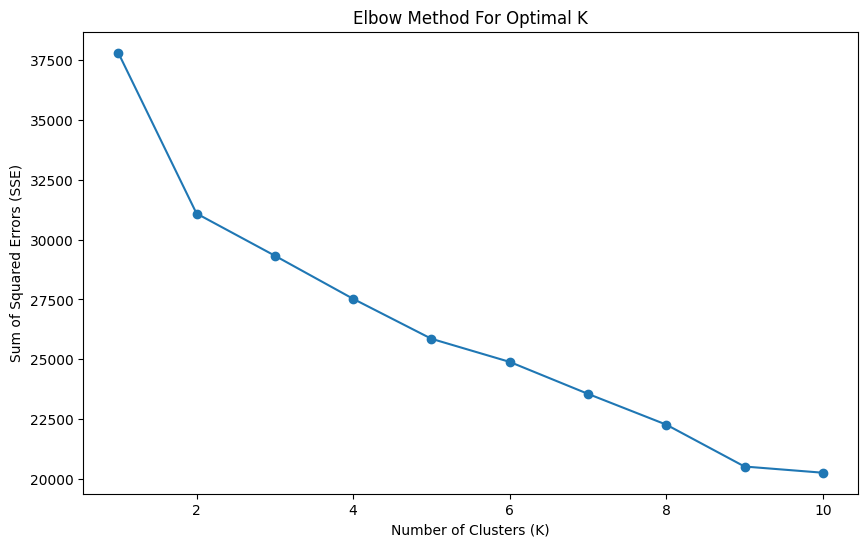

In [34]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('Categories.csv')

# 提取研究领域，并处理分号分隔的多标签
research_areas = df.iloc[:, 1].apply(lambda x: x.split(';'))

# 对多标签进行二值编码
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(research_areas)

# 显示二值编码后的部分数据
print(encoded_df.head())

# 将二值编码后的结果输出为文件
encoded_df = pd.DataFrame(X, columns=mlb.classes_)
encoded_df.to_csv('Encoded_Research_Areas.csv', index=False)

# 使用手肘法选择最佳K值
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 绘制手肘图
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


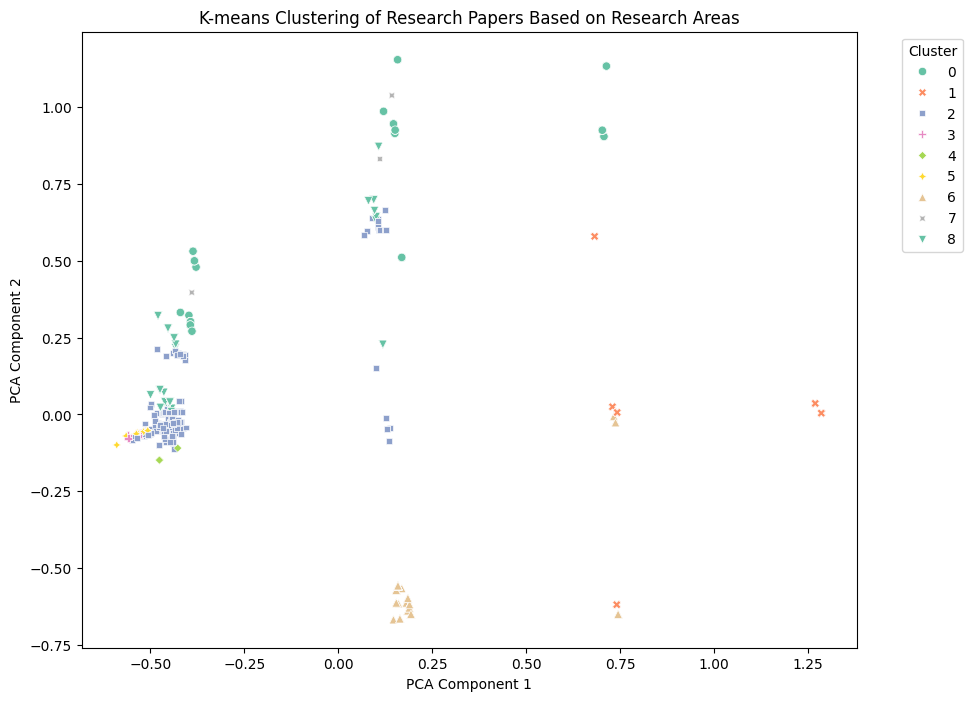

Cluster 0:
    id                                     WoS_Categories  Cluster      PCA1  \
29  30  Computer Science, Hardware & Architecture; Com...        0 -0.393303   
33  34  Computer Science, Hardware & Architecture; Com...        0  0.150700   
35  36  Computer Science, Hardware & Architecture; Com...        0 -0.393303   
36  37  Computer Science, Hardware & Architecture; Com...        0 -0.386060   
52  53  Computer Science, Hardware & Architecture; Com...        0  0.713236   

        PCA2  
29  0.291281  
33  0.914271  
35  0.291281  
36  0.531067  
52  1.133315  

Cluster 1:
   id                                     WoS_Categories  Cluster      PCA1  \
2   3  Computer Science, Information Systems; Enginee...        1  1.284655   
3   4  Computer Science, Information Systems; Enginee...        1  1.284655   
4   5  Computer Science, Information Systems; Enginee...        1  1.284655   
7   8  Computer Science, Information Systems; Enginee...        1  1.284655   
9  10  Comp

In [38]:
# 根据手肘图选择的最佳K值，重新应用K-means聚类
optimal_k = 9  # 假设通过手肘图确定最佳K值为5，实际请根据手肘图调整
model = KMeans(n_clusters=optimal_k, random_state=42)
model.fit(X)

# 获取聚类标签
labels = model.labels_

# 将聚类标签添加到原始数据中
df['Cluster'] = labels

# 使用PCA将高维特征降到二维
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# 将降维后的结果保存到数据框中
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# 可视化聚类结果
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', style='Cluster', palette='Set2', data=df, markers=True)
plt.title('K-means Clustering of Research Papers Based on Research Areas')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 输出每个聚类的结果到文件，并显示部分结果
for cluster in range(optimal_k):
    cluster_df = df[df['Cluster'] == cluster]
    cluster_df.to_csv(f'Cluster_{cluster}.csv', index=False)
    print(f'Cluster {cluster}:')
    print(cluster_df.head())
    print()

# 保存包含所有聚类标签的完整结果
df.to_csv('Clustered_Categories.csv', index=False)